<h1 style="color:pink;">Introduction</h1>

 فثسف In this classification project, the dataset [diabetes_012_health_indicators_BRFSS2015.csv](https://www.kaggle.com/datasets) is utilized, which contains 253,680 clean survey responses from the CDC's 2015 Behavioral Risk Factor Surveillance System (BRFSS).

The target variable, Diabetes_012, consists of three classes:

0: No diabetes or only during pregnancy  
1: Prediabetes  
2: Diabetes

Additionally, the dataset comprises 21 feature variables. Several steps will be followed to select and optimize models for high performance and accuracy.

In [2]:
# Install the imbalanced-learn library for handling and analyzing imbalanced datasets
!pip install imblearn

# Install the XGBoost library for model building and prediction using the XGBoost algorithm
!pip install xgboost


In [1]:

# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical computations
import numpy as np

# Importing the pyplot module from matplotlib for creating plots
import matplotlib.pyplot as plt

# Importing the seaborn library for statistical data visualization
import seaborn as sns


### Loading the Dataset and Displaying the First Few Rows

The following code loads the dataset from a CSV file into a pandas DataFrame and displays the first five rows to give a quick overview of the data:

In [14]:
# Load the dataset into a DataFrame
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Shows the first 5 rows to get a quick look at the data
print(data.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [15]:
# Display the number of rows (samples) and columns (features) in the dataset
print("Initial shape of the dataframe:", data.shape)

Initial shape of the dataframe: (253680, 22)


In [16]:
# Display the statistical summary of the dataset, including count, mean, std, min, 25th percentile, median, 75th percentile, and max for each numerical column
print(data.describe)

<bound method NDFrame.describe of         Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealt

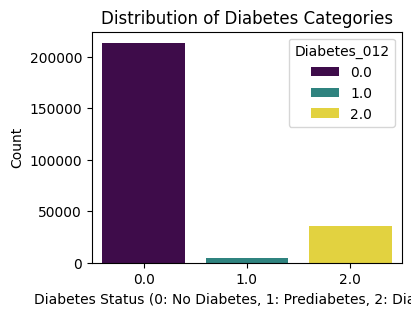

In [ ]:
# Create a new figure with a specified size (4 inches by 3 inches)
plt.figure(figsize=(4, 3))

# Create a countplot to visualize the distribution of the 'Diabetes_012' column,
# with different colors based on the 'Diabetes_012' values, using the 'viridis' palette
sns.countplot(x=data["Diabetes_012"], hue=data["Diabetes_012"], palette="viridis")

# Set the title of the plot
plt.title("Distribution of Diabetes Categories")

# Set the label for the x-axis
plt.xlabel("Diabetes Status (0: No Diabetes, 1: Prediabetes, 2: Diabetes)")

# Set the label for the y-axis
plt.ylabel("Count")

# Display the plot
plt.show()


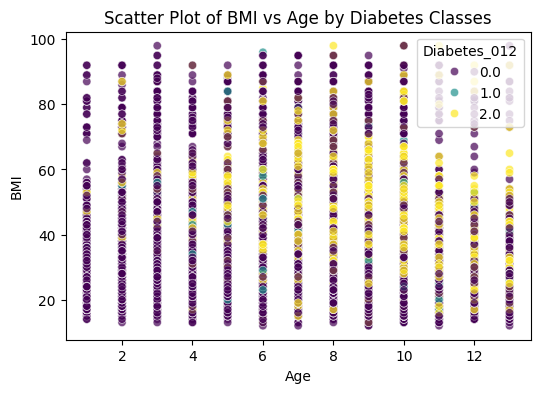

In [ ]:
# Here the visualization of BMI vs Age will be placed, needs a bit of fixing
plt.figure(figsize=(6, 4))  # Create a new figure with a specified size (6 inches by 4 inches)

# Create a scatter plot with 'Age' on the x-axis, 'BMI' on the y-axis,
# and color points by the 'Diabetes_012' column using the 'viridis' palette
# Set alpha to 0.7 for slightly transparent points
sns.scatterplot(x=data['Age'], y=data['BMI'], hue=data['Diabetes_012'], palette="viridis", alpha=0.7)

# Set the title of the plot
plt.title("Scatter Plot of BMI vs Age by Diabetes Classes")

# Set the label for the x-axis
plt.xlabel("Age")

# Set the label for the y-axis
plt.ylabel("BMI")

# Display the plot
plt.show()


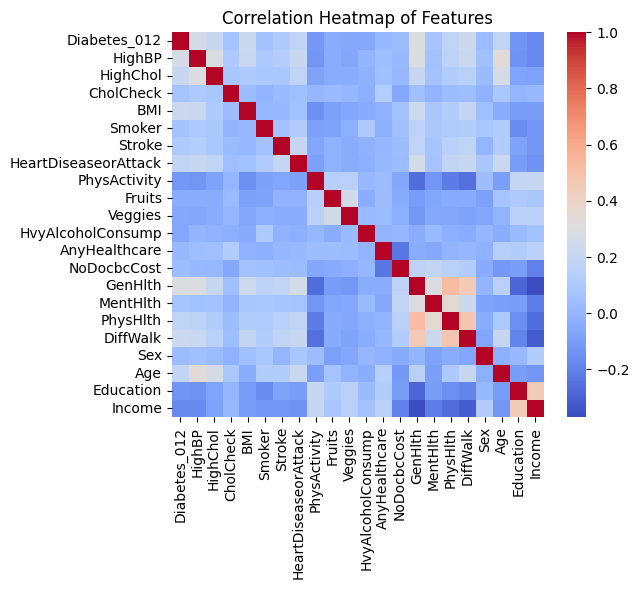

In [19]:
# 2. Correlation heatmap
# Create a figure with a specific size
plt.figure(figsize=(6, 5))

# Calculate the correlation matrix of the dataframe
corr = data.corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr, annot=False, cmap="coolwarm", cbar=True, fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Features")

# Display the heatmap
plt.show()


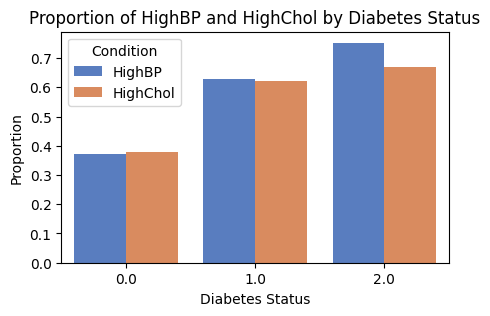

In [22]:
# 3. Bar plot of HighBP and HighChol by Diabetes Status
plt.figure(figsize=(5, 3))

# Group the dataset by 'Diabetes_012' and calculate mean values for 'HighBP' and 'HighChol'
highbp_chol = data.groupby("Diabetes_012")[["HighBP", "HighChol"]].mean().reset_index()

# Melt the data so that 'HighBP' and 'HighChol' are in the same column for easier plotting
highbp_chol_melted = highbp_chol.melt(id_vars=["Diabetes_012"], value_vars=["HighBP", "HighChol"], 
                                      var_name="Condition", value_name="Proportion")

# Create a bar plot showing the proportions of HighBP and HighChol by Diabetes Status
sns.barplot(data=highbp_chol_melted, x="Diabetes_012", y="Proportion", hue="Condition", palette="muted")

# Add title and labels
plt.title("Proportion of HighBP and HighChol by Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("Proportion")

# Show the legend
plt.legend(title="Condition")

# Display the plot
plt.show()


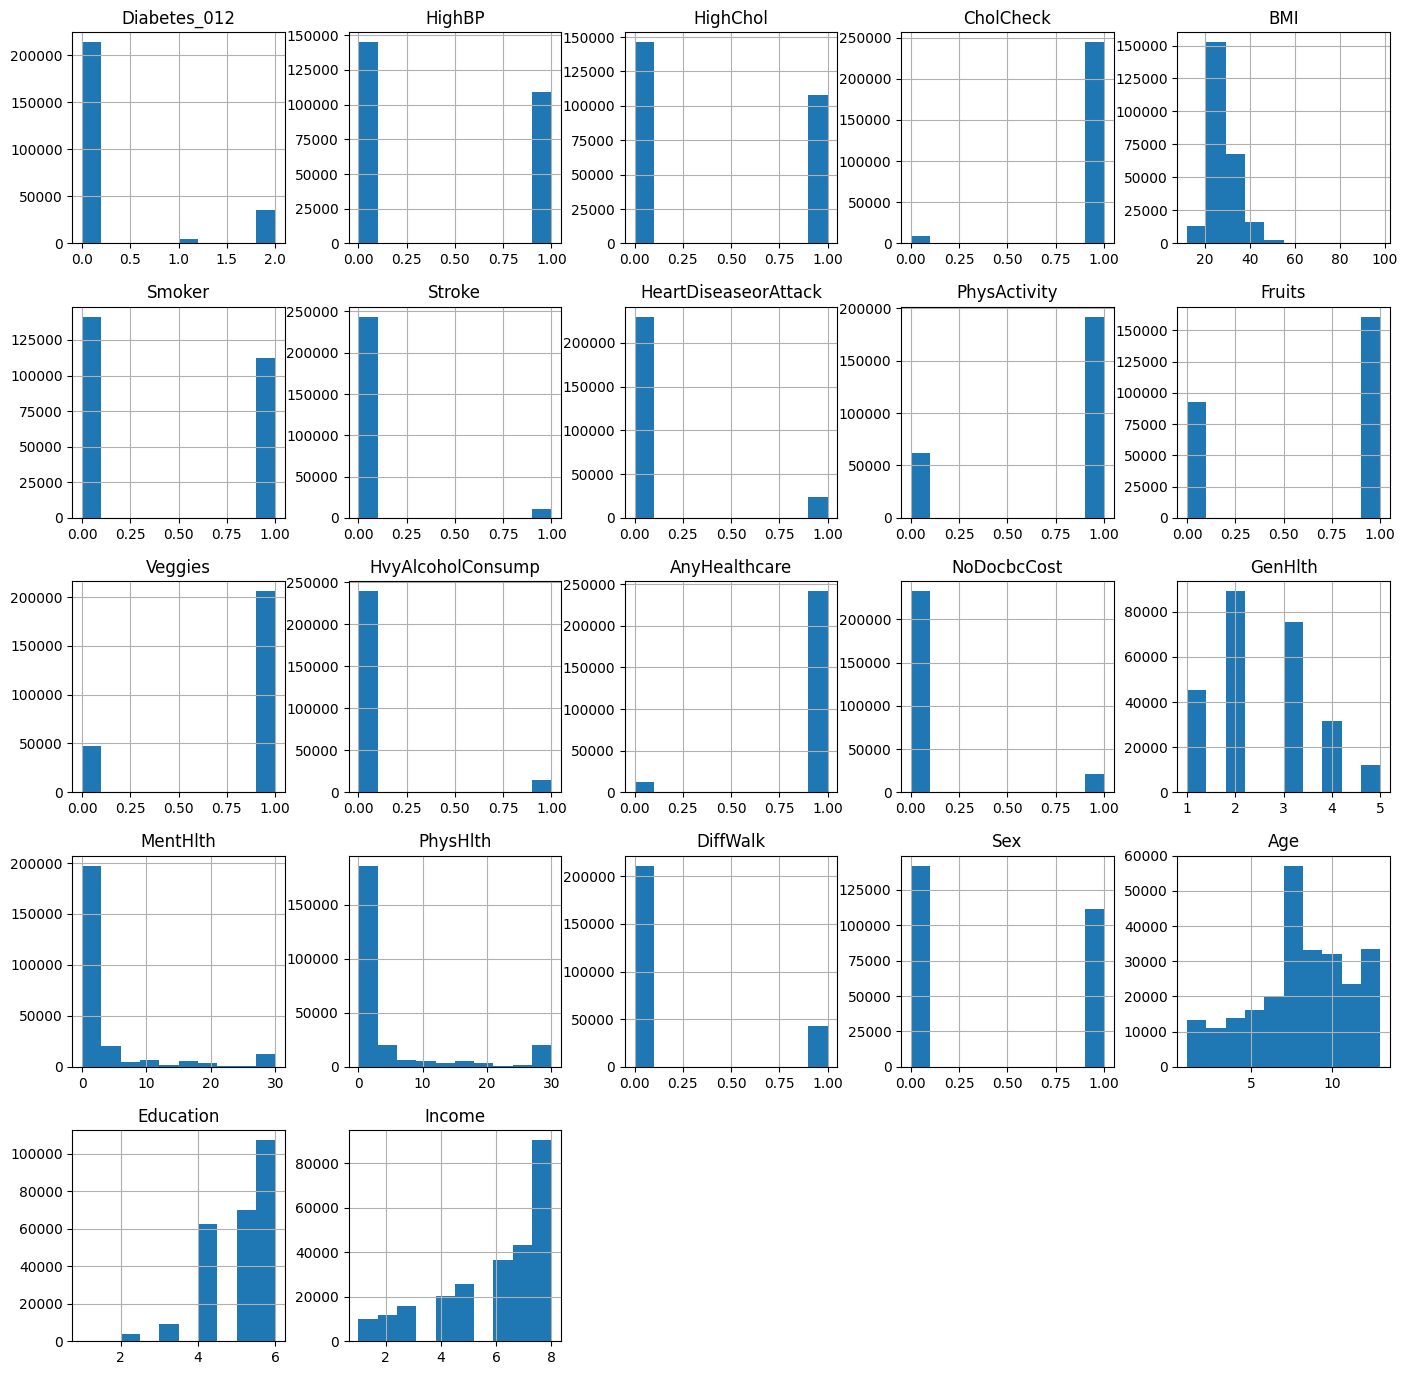

In [23]:
# Distributions of attributes 
data.hist(figsize = (17, 17))  # Create histograms for all columns in the DataFrame
plt.show()  # Display the histograms

In [24]:
# Check for missing values in each column and print a summary
print("Missing values per column:\n", data.isnull().sum())
if data.isnull().sum().sum() == 0:
    print("No missing values found in the dataset.")


Missing values per column:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
No missing values found in the dataset.


In [26]:
# Remove columns with over 95% of the same value (low variability)
# This loop removes unhelpful columns, making the dataset more useful
for column in data.columns:
    if data[column].value_counts(normalize=True, dropna=False).iloc[0] > 0.95:
        data.drop(column, axis=1, inplace=True)

print("Shape of the dataframe after dropping columns:", data.shape)

Shape of the dataframe after dropping columns: (253680, 19)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# Separate features and target
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

# Standardize numerical features
continuous_columns = [col for col in X.columns if data[col].dtype in ['int64', 'float64']]
scaler = StandardScaler()
X[continuous_columns] = scaler.fit_transform(X[continuous_columns])

# Split the data into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the balanced class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_balanced))



Training set shape: (177576, 18)
Validation set shape: (38052, 18)
Test set shape: (38052, 18)
Class distribution after SMOTE: Counter({2.0: 149523, 0.0: 149523, 1.0: 149523})


In [ ]:
# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest Model
param_grid_rf = {
    'n_estimators': [10, 20, 30],
#    'max_depth': [10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
}
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_


In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier  # Add this import
from sklearn.model_selection import GridSearchCV

# Decision Tree Model
param_grid_dt = {
    # Uncomment to try different hyperparameters
    # 'max_depth': [None, 5, 10, 15, 20],
    # 'min_samples_split': [2, 5, 10, 15],
    # 'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
param_grid = {  
    'n_neighbors': [3, 7, 11],
    # Uncomment to try different hyperparameters  
    # 'weights': ['uniform', 'distance'],     
    # 'metric': ['euclidean', 'manhattan']    
}  

# Train-validation split
X_train_knn, X_val_knn, y_train_knn, y_val_knn = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  

# Initialize KNN model and perform grid search
knn_model = KNeighborsClassifier()  
grid_search = GridSearchCV(knn_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)  
grid_search.fit(X_train_knn, y_train_knn)   

# Get the best KNN model
best_knn = grid_search.best_estimator_
